# Importerer nødvendige biblioteker

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæsning af data

In [4]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
10219,Jet Airways,24/06/2019,Delhi,09:25,Cochin,0,13882
5604,IndiGo,9/03/2019,Delhi,06:40,Cochin,0,6442
2650,Vistara,9/06/2019,Chennai,17:45,Kolkata,0,11982
3903,IndiGo,6/06/2019,Chennai,07:55,Kolkata,0,3850
3945,Air India,12/03/2019,Mumbai,16:50,Hyderabad,0,14260


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [7]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [8]:
# Finder alle rækker der er identiske med mindst én anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [9]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

In [11]:
# Fjerner 'Dep_Time' kolonnen, da den ikke er relevant for analysen
df.drop(['Dep_Time'], axis=1, inplace=True) 

In [12]:
# Konverterer 'Date_of_Journey' til datetime format for at gøre videre analyse nemmere
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y') 

# Opretter en ny kolonne 'Journey_month' som indeholder måneden fra 'Date_of_Journey'
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_month'] = df['Journey_month'].astype('int64')  # Sikrer datatypen som int64 for konsistens

In [13]:
# Gendanner 'Class' ud fra 'Airline', da den oprindelige kolonne kun indeholdt 0'er og ingen reel information
df['Class'] = df['Airline'].apply(lambda x: 'Business' if 'Business' in x else ('Premium economy' if 'Premium economy' in x else 'Standard'))

In [14]:
# Udfører one-hot encoding på de kategoriske kolonner for at gøre dem numeriske og lettere at regressere på
dfNumeric = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Date_of_Journey'], dtype=pd.Int64Dtype())

# Sørger for at alle kolonner vises i output, så man kan verificere one-hot encoding
pd.set_option('display.max_columns', None)

# Viser 5 tilfældige rækker af det transformerede datasæt
dfNumeric.sample(5)

,Class,Price,Journey_month,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date_of_Journey_2019-03-01 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-06 00:00:00,Date_of_Journey_2019-03-09 00:00:00,Date_of_Journey_2019-03-12 00:00:00,Date_of_Journey_2019-03-15 00:00:00,Date_of_Journey_2019-03-18 00:00:00,Date_of_Journey_2019-03-21 00:00:00,Date_of_Journey_2019-03-24 00:00:00,Date_of_Journey_2019-03-27 00:00:00,Date_of_Journey_2019-04-01 00:00:00,Date_of_Journey_2019-04-03 00:00:00,Date_of_Journey_2019-04-06 00:00:00,Date_of_Journey_2019-04-09 00:00:00,Date_of_Journey_2019-04-12 00:00:00,Date_of_Journey_2019-04-15 00:00:00,Date_of_Journey_2019-04-18 00:00:00,Date_of_Journey_2019-04-21 00:00:00,Date_of_Journey_2019-04-24 00:00:00,Date_of_Journey_2019-04-27 00:00:00,Date_of_Journey_2019-05-01 00:00:00,Date_of_Journey_2019-05-03 00:00:00,Date_of_Journey_2019-05-06 00:00:00,Date_of_Journey_2019-05-09 00:00:00,Date_of_Journey_2019-05-12 00:00:00,Date_of_Journey_2019-05-15 00:00:00,Date_of_Journey_2019-05-18 00:00:00,Date_of_Journey_2019-05-21 00:00:00,Date_of_Journey_2019-05-24 00:00:00,Date_of_Journey_2019-05-27 00:00:00,Date_of_Journey_2019-06-01 00:00:00,Date_of_Journey_2019-06-03 00:00:00,Date_of_Journey_2019-06-06 00:00:00,Date_of_Journey_2019-06-09 00:00:00,Date_of_Journey_2019-06-12 00:00:00,Date_of_Journey_2019-06-15 00:00:00,Date_of_Journey_2019-06-18 00:00:00,Date_of_Journey_2019-06-21 00:00:00,Date_of_Journey_2019-06-24 00:00:00,Date_of_Journey_2019-06-27 00:00:00
6209,Standard,16736,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6976,Standard,6300,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1138,Standard,6460,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9020,Standard,3597,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8642,Standard,11467,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline            string[python]
Date_of_Journey    datetime64[ns]
Source             string[python]
Destination        string[python]
Class              string[python]
Price                       int64
Journey_month               int64
dtype: object

# Dataudforskning

In [17]:
df.describe()

,Date_of_Journey,Price,Journey_month
count,8682,8682.000000,8682.000000
mean,2019-05-04 12:20:24.049758208,8434.731283,4.695001
min,2019-03-01 00:00:00,1759.000000,3.000000
25%,2019-03-27 00:00:00,4823.000000,3.000000
50%,2019-05-15 00:00:00,7229.000000,5.000000
75%,2019-06-06 00:00:00,11410.000000,6.000000
max,2019-06-27 00:00:00,79512.000000,6.000000
std,NaN,4605.337734,1.164916


Date_of_Journey: Datoerne Strækker sig fra 1. marts til 27. juni 2019, med median omkring midt i maj.

Price: Priserne varierer fra 1.759 til 79.512, med en gennemsnitlig pris på ca. 8.435.

Journey_month: Rejserne fordeler sig over månederne marts (3) til juni (6), med flest rejser omkring april–maj (gennemsnit 4,7).

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

Standardafvigelsen vises som NaN for datoer, da det ikke er beregnbar, da det er en datetime-værdi

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Class', 'Price',
       'Journey_month'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [21]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'DATE-OF-JOURNEY', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE',
       'JOURNEY-MONTH'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [23]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'date_of_journey', 'source', 'destination', 'class', 'price',
       'journey_month'],
      dtype='object')


For at opnå en bedre forståelse af prisdataenes fordeling udfører vi først grundlæggende visualiseringer.

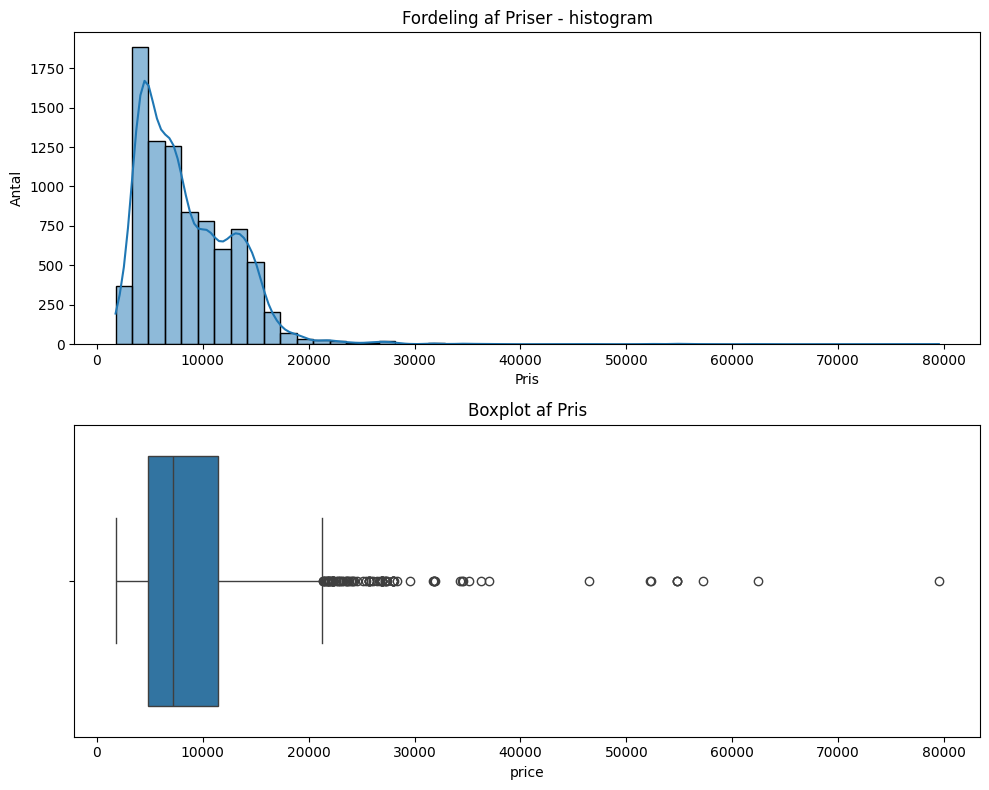

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [25]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram med KDE øverst
plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser - histogram')
plt.ylabel('Antal')
plt.xlabel('Pris')

# Boxplot nederst
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot af Pris')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())
kurt = kurtosis(df['price'].dropna())

print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen er højreskæv (positiv skævhed), hvilket betyder, at der er flere lavere værdier, og den højre hale af fordelingen er længere.

Fordelingen har også høj kurtosis, hvilket indikerer, at dataene er spidsere end en normalfordeling, og der er flere ekstreme værdier (outliers) end vi ville forvente i en normalfordeling. Dette tyder på, at vores data kan indeholde nogle ekstreme observationer, som vi vil fjerne ved hjælp af z-score teknikken for at forbedre modellens præcision.

In [27]:
from z_score import beregnDataFrame, hentOutliers

# Beregner 1. og 3. kvartil for 'price' for at bestemme IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Beregner Interkvartilafstand (IQR)
IQR = Q3 - Q1

# Definerer nedre og øvre grænser for acceptable priser baseret på IQR-metoden
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrerer data for at fjerne outliers baseret på IQR-reglen
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

# Anvender z-score metode til yderligere at identificere outliers i pris (uden at fjerne dem endnu)
_ = beregnDataFrame(df_no_outliers[['price']], tærskel=3.0, fjern=False)

# Henter listen over outliers fundet via z-score metoden
price_outliers = hentOutliers()

# Fjerner rækker i datasættet hvor 'price' matcher outliers identificeret med z-score
df_final = df_no_outliers[~df_no_outliers['price'].isin(price_outliers)].copy()


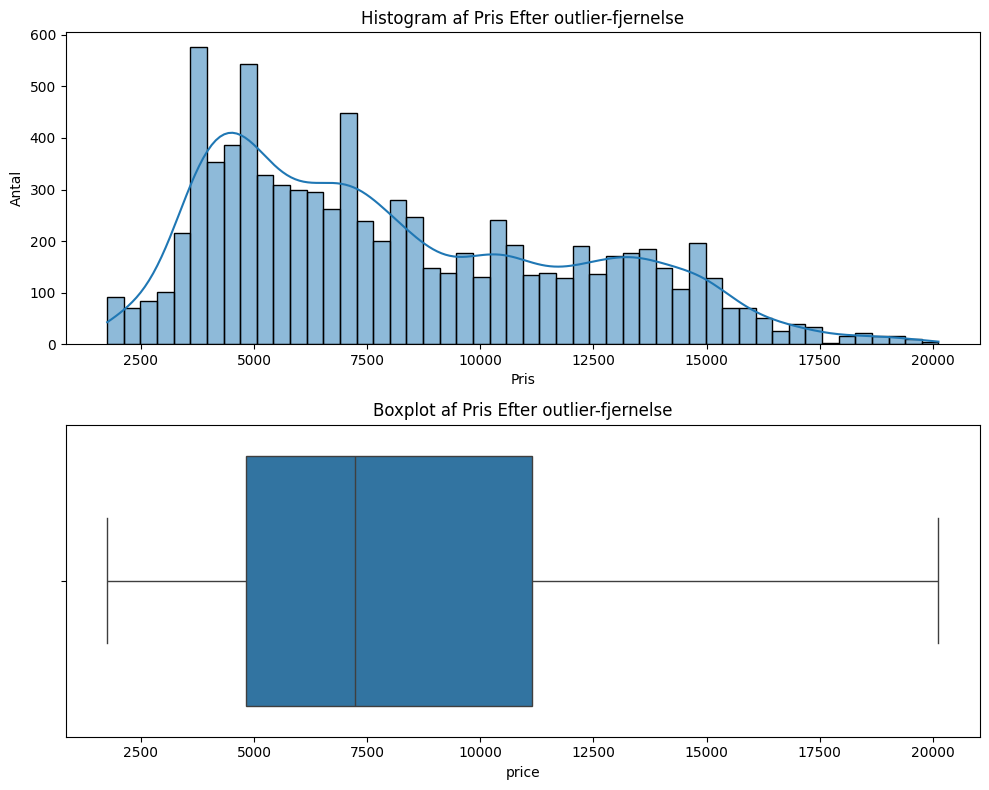

Skævhed (Skewness): 0.60
Kurtosis: -0.62
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [28]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram efter outlier-fjernelse
plt.subplot(2, 1, 1)
sns.histplot(df_final['price'], kde=True, bins=50)
plt.title('Histogram af Pris Efter outlier-fjernelse')
plt.xlabel('Pris')
plt.ylabel('Antal')

# Boxplot efter outlier-fjernelse
plt.subplot(2, 1, 2)
sns.boxplot(x=df_final['price'])
plt.title('Boxplot af Pris Efter outlier-fjernelse')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis efter outlier-fjernelse
skewness_after = skew(df_final['price'].dropna())
kurt_after = kurtosis(df_final['price'].dropna())

print(f"Skævhed (Skewness): {skewness_after:.2f}")
print(f"Kurtosis: {kurt_after:.2f}")

if skewness_after > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness_after < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt_after > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt_after < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")

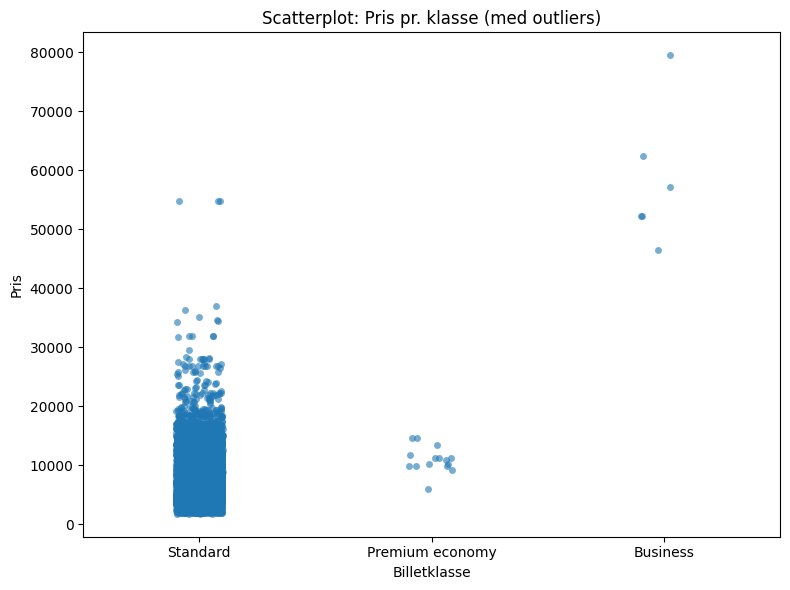

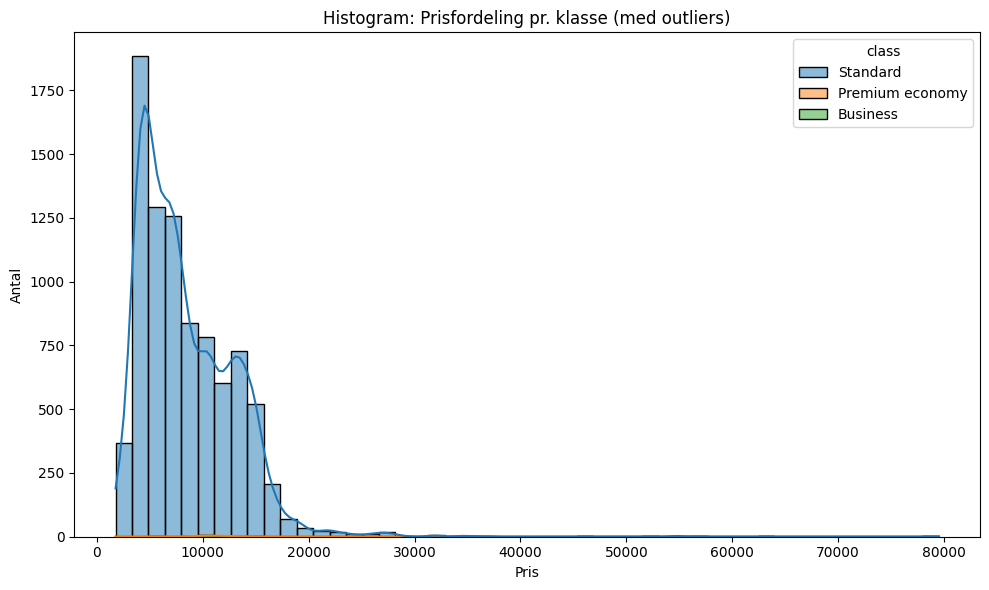

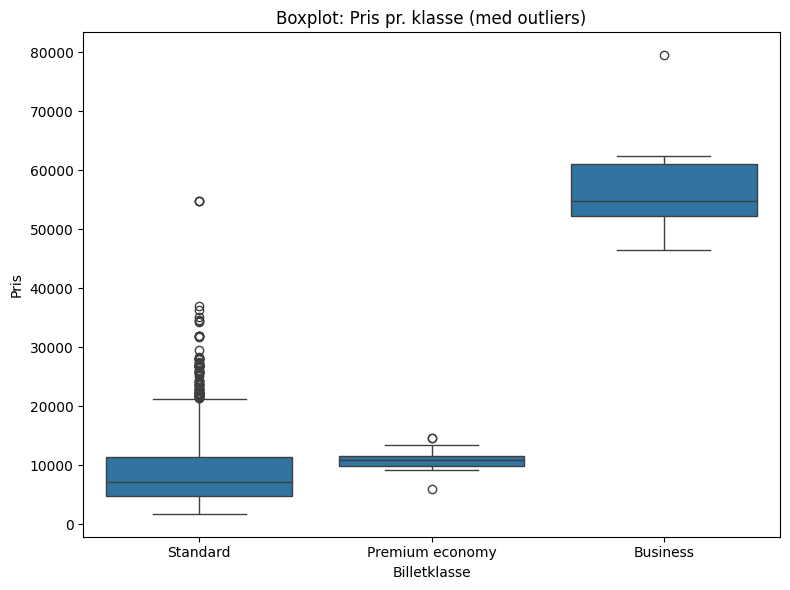

Gennemsnitspriser pr. klasse (med outliers):
Standard: 8395.81
Premium economy: 10937.53
Business: 58358.67


In [29]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge med outliers
mean_prices = df.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (med outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")


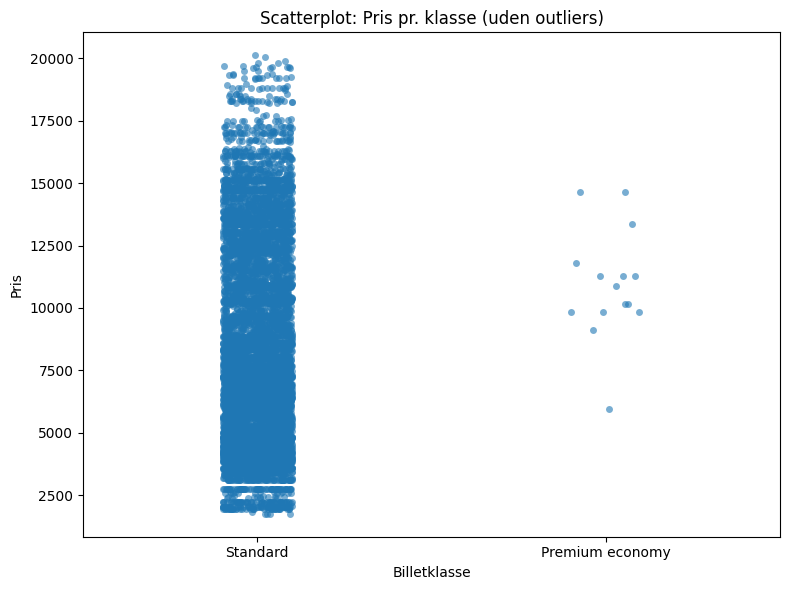

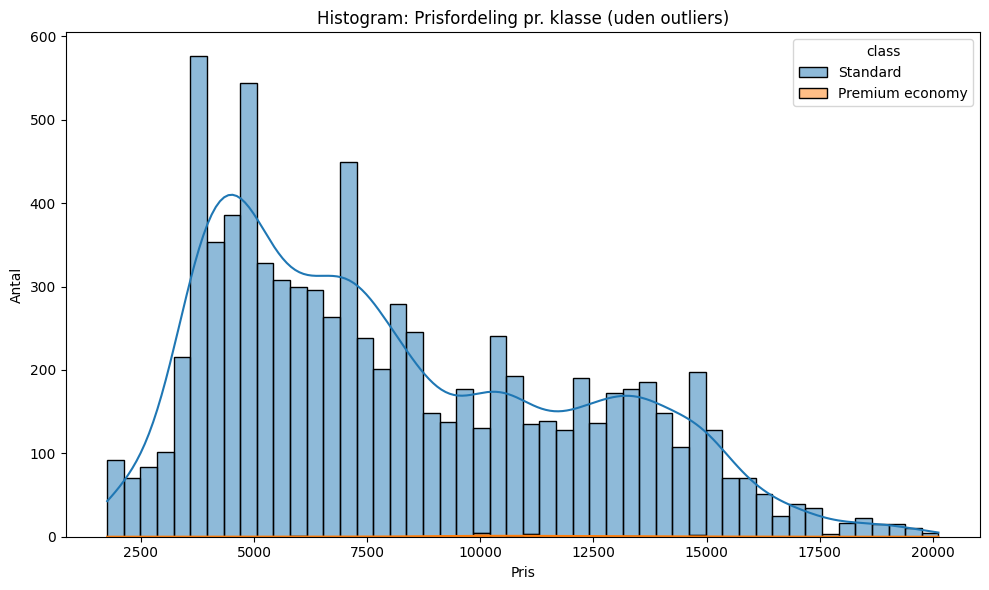

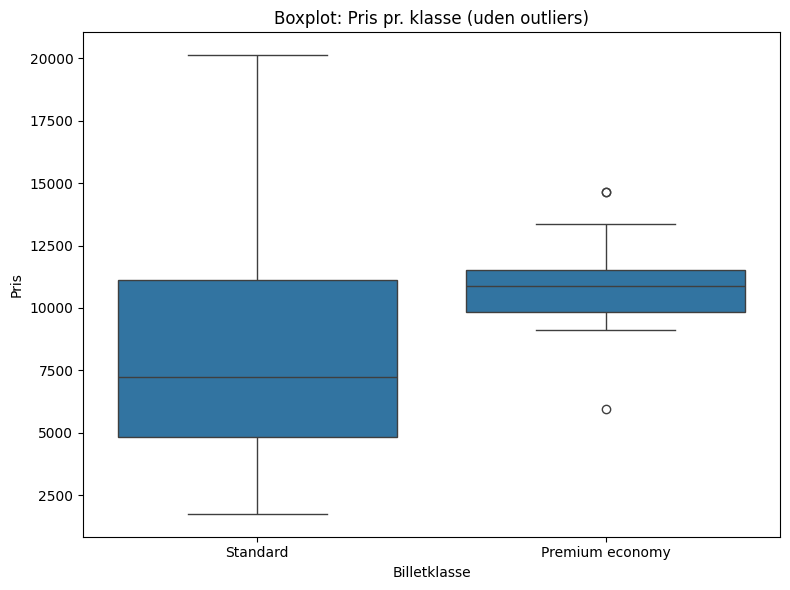

Gennemsnitspriser pr. klasse (uden outliers):
Standard: 8193.79
Premium economy: 10937.53


In [30]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (uden outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (uden outliers)' )
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge uden outliers
mean_prices = df_final.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (uden outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")


Under analysen blev Business-klassen fjernet som outliers på grund af deres naturligt højere priser sammenlignet med de øvrige klasser. Da disse priser er væsentlige for forståelsen af prisstrukturen, har vi valgt ikke at fjerne disse outliers for at bevare vigtig information. Derfor fortsætter vi analysen med datasættet inklusive outliers, så vi bedre kan afspejle, at Business-klassen har en højere pris end standardversionerne inden for samme flyselskab.

Resultatet viser tydeligt, at priserne varierer betydeligt mellem standard og premium-versionerne inden for samme flyselskab.

Gennemsnitsprisen for standardklassen ligger omkring 8.396, mens Premium Economy har en højere gennemsnitspris på cirka 10.938. Dette indikerer, at Premium Economy tilbyder ekstra komfort eller services, som reflekteres i den højere pris.

Business-klassen skiller sig markant ud med en gennemsnitspris på hele 58.359, hvilket er væsentligt højere end både standard og Premium Economy. Dette understreger, at Business er en premium-version med en betydeligt højere pris, som afspejler dens luksus og ekstra ydelser.

Sammenfattende viser analysen, at premium-versionerne, især Business-klassen, har en markant højere pris end standardversionerne, hvilket bekræfter, at prisniveauet stiger i takt med billetklassens premium-status inden for samme flyselskab.

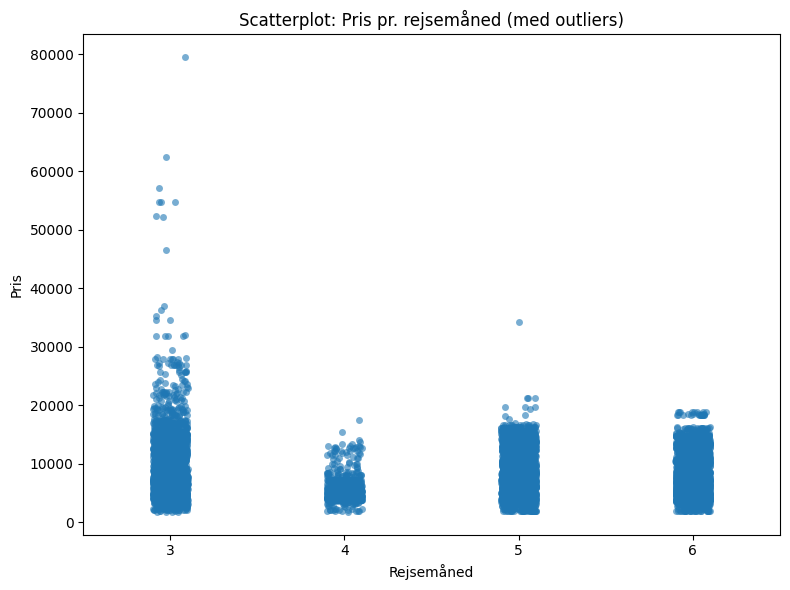

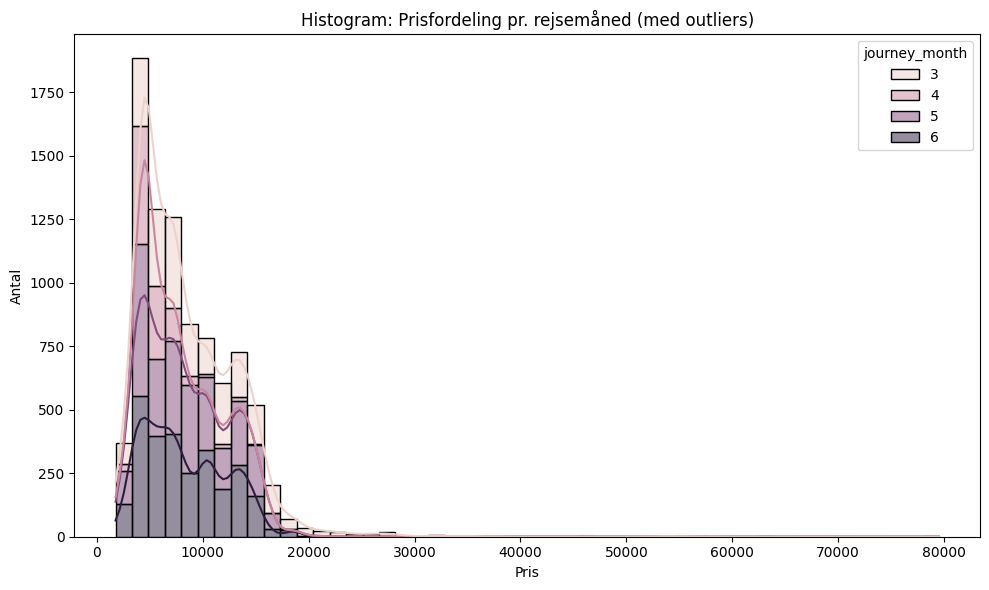

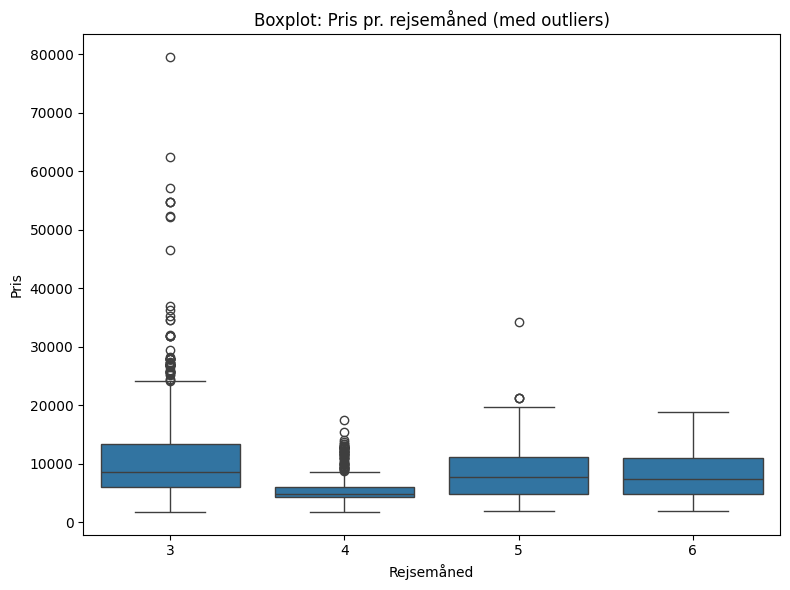

Gennemsnitspriser pr. rejsemåned (med outliers):
3: 10134.81
4: 5471.87
5: 8333.68
6: 8229.98


In [33]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

mean_prices = df.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (med outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")



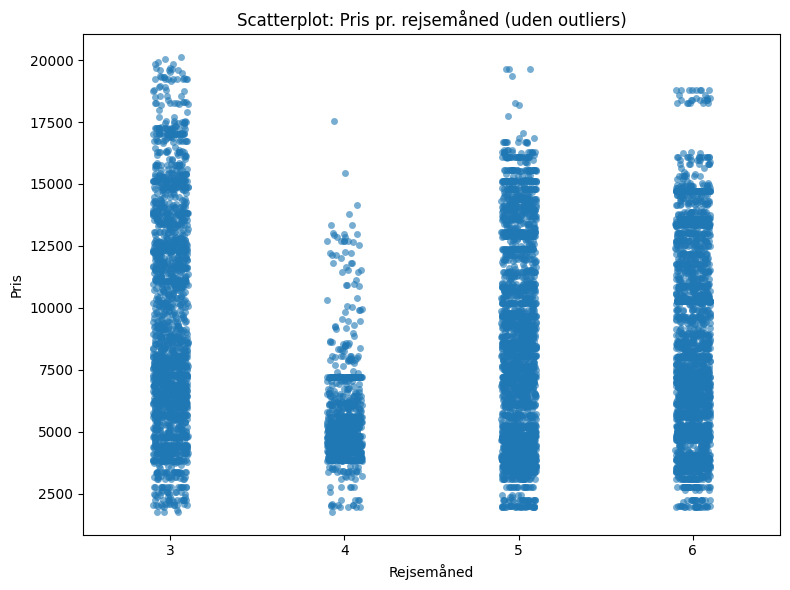

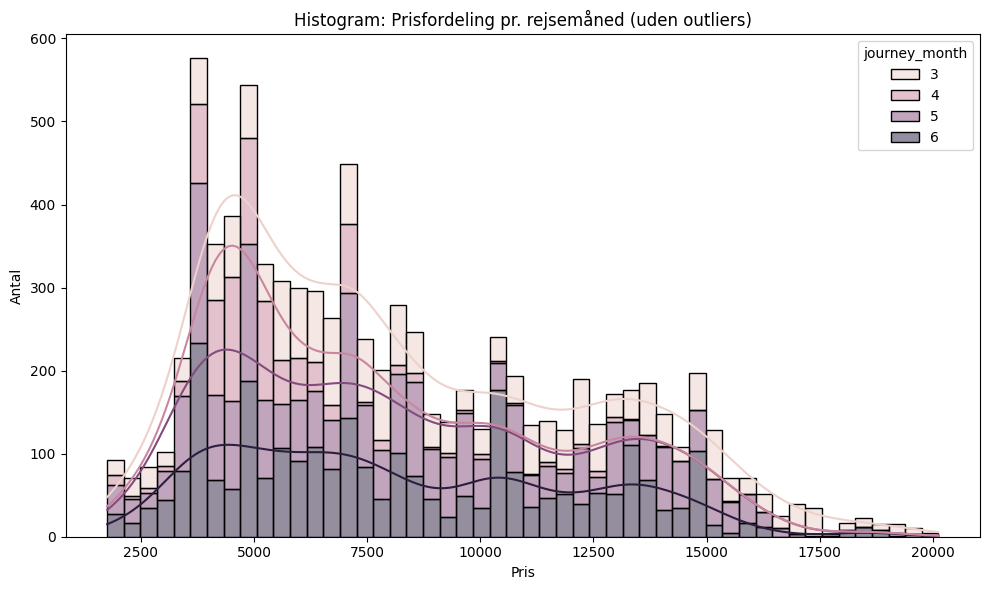

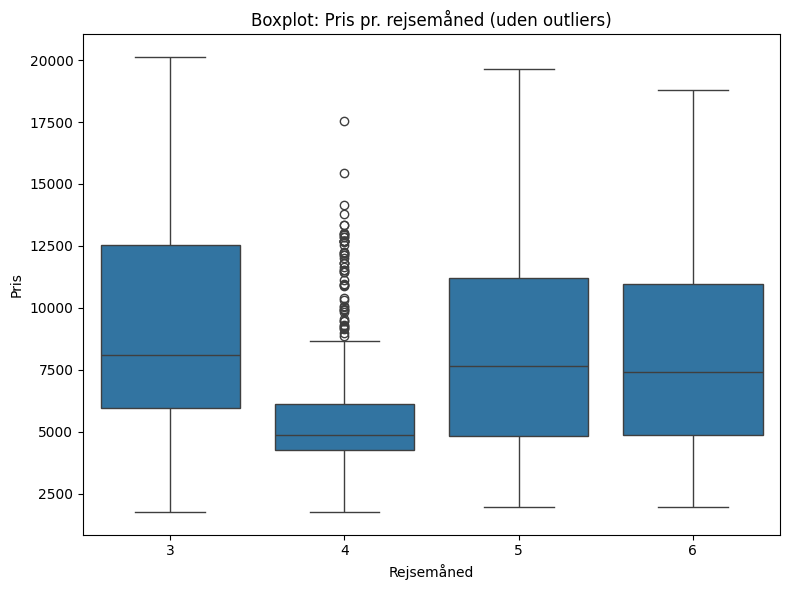

Gennemsnitspriser pr. rejsemåned (uden outliers):
3: 9286.19
4: 5471.87
5: 8309.96
6: 8229.98


In [34]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Gennemsnitspriser pr. rejsemåned
mean_prices = df_final.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (uden outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")

Priserne varierer tydeligt afhængigt af rejsemåneden. Den laveste gennemsnitspris findes i april (måned 4) med cirka 5.472, hvilket tyder på, at det er en mere økonomisk måned at rejse i. Priserne stiger markant i maj og juni (måneder 5 og 6) til omkring 8.300-8.230, hvilket indikerer øget efterspørgsel eller sæsonbestemte prisstigninger i disse måneder. Den højeste gennemsnitspris observeres i marts (måned 3) med cirka 9.286 uden outliers og endnu højere (ca. 10.135) når outliers inkluderes. Dette antyder, at rejser i marts generelt er dyrere, muligvis grundet ferieperioder eller andre faktorer, der påvirker efterspørgslen. 

Samlet set viser analysen, at rejsemåneden har en væsentlig indflydelse på prisniveauet især skiller marts sig ud som den dyreste måned, mens april fremstår som den billigste.

Tjekker unikke værdier før og efter omkodning:
Unikke værdier i 'class' (før omkodning): <StringArray>
['Standard', 'Premium economy', 'Business']
Length: 3, dtype: string
Unikke værdier i 'class_matrix' (efter omkodning): [0 1 2]
Valgte kolonner til korrelationsanalyse: ['price', 'class_matrix']
Beregnet korrelationsmatrix:
                 price  class_matrix
price         1.000000      0.237835
class_matrix  0.237835      1.000000


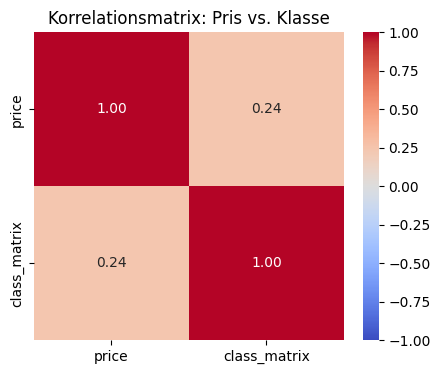

In [36]:
# Omkoder 'class' (tekst/string) til numerisk ordinal i en ny kolonne 'class_matrix',
# så klasserne kan bruges i numerisk analyse som korrelation.
class_map = {'Standard': 0, 'Premium economy': 1, 'Business': 2}
df['class_matrix'] = df['class'].map(class_map)

# Tjekker at omkodningen er udført korrekt
print("Tjekker unikke værdier før og efter omkodning:")
print("Unikke værdier i 'class' (før omkodning):", df['class'].unique())
print("Unikke værdier i 'class_matrix' (efter omkodning):", df['class_matrix'].unique())

# Vælger de relevante kolonner til korrelationsanalyse: pris og den omkodede klasse
cols_to_corr = ['price', 'class_matrix']
print("Valgte kolonner til korrelationsanalyse:", cols_to_corr)

# Beregner korrelationsmatrix for valgte variabler
corr = df[cols_to_corr].corr()
print("Beregnet korrelationsmatrix:")
print(corr)

# Visualiserer korrelationsmatrixen som heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Klasse")
plt.show()

Korrelationsmatrixen viser en svag til moderat positiv sammenhæng på omkring 0,24 mellem pris og flyklasse (class_matrix). Det indikerer, at prisen typisk øges, jo højere klassen er (Standard < Premium economy < Business), men denne relation er ikke særlig stærk. Det tyder på, at der også er andre faktorer, der spiller ind på prisen.

In [38]:
avg_prices = df.groupby(['airline', 'class'])['price'].mean().unstack()
print("\nGennemsnitspriser pr. flyselskab og klasse:")
print(avg_prices)


Gennemsnitspriser pr. flyselskab og klasse:
class                                  Business  Premium economy      Standard
airline                                                                       
Air Asia                                    NaN              NaN   5439.607639
Air India                                   NaN              NaN   9462.014075
GoAir                                       NaN              NaN   5861.056701
IndiGo                                      NaN              NaN   5592.643539
Jet Airways                                 NaN              NaN  11114.544343
Jet Airways Business               58358.666667              NaN           NaN
Multiple carriers                           NaN              NaN  10856.087273
Multiple carriers Premium economy           NaN     11431.333333           NaN
SpiceJet                                    NaN              NaN   4335.841718
Trujet                                      NaN              NaN   4140.000000
Vistara

Gennemsnittene bekræfter, at Business class generelt har de højeste priser, efterfulgt af Premium economy, mens Standard class er billigst. Dog er der flyselskaber, som kun tilbyder visse klasser i datasættet, hvilket fremgår af NaN-værdierne. Eksempelvis har 'Jet Airways Business' kun Business klasse-data, mens 'Vistara Premium economy' kun har Premium economy-priser. Standard klassen er tilgængelig på alle flyselskaber og har de laveste gennemsnitspriser.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])

# Se, at scaled-pris har middel 0 og std. 1
print(f"Middelværdi: {df['price_scaled'].mean():}, Standardafvigelse: {df['price_scaled'].std():}")

Middelværdi: -5.074136099645958e-17, Standardafvigelse: 1.0000575953924187


Middelværdien af den skalerede pris er tæt på 0 (-0.00000), og standardafvigelsen er cirka 1.00006, hvilket viser, at standardiseringen er udført korrekt.